<a href="https://colab.research.google.com/github/park-geun-hyeong/practice_pytorch/blob/main/asl_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LIbrary Import

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from tqdm import tqdm, tqdm_notebook
import gc

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import warnings 
warnings.filterwarnings('ignore')

## Data

In [9]:
path = '/content/drive/MyDrive/PyTorch/homework/IT_HW2/'  

In [14]:
train = pd.read_csv(path + sorted(os.listdir(path))[1])
val = pd.read_csv(path+ sorted(os.listdir(path))[2])  

In [124]:
train.shape, val.shape

((27455, 785), (7172, 785))

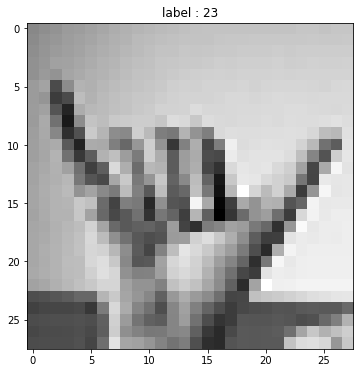

In [67]:
idx = np.random.randint(train.shape[0])

img = train.iloc[idx,1:].values.reshape(28,28).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title(f"label : {train.iloc[idx,0]}")
plt.show()

## DataSet, DataLoader

In [109]:
class asl_dataset(Dataset):
    def __init__(self, df):
        super(asl_dataset,self).__init__()
        self.df = df

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx: int):
        img = self.df.iloc[idx,1:].values.astype(np.uint8) / 255.
        label = int(self.df.label[idx])

        img_tensor = torch.tensor(img).float()
        label_tensor = torch.tensor(label)

        return img_tensor, label_tensor


In [110]:
train_dataset = asl_dataset(train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

## Model

In [105]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,24)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

In [106]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr= 1e-3)
loss_fn = nn.CrossEntropyLoss() 


## Train

In [107]:
epoch = 50

for i in tqdm_notebook(range(epoch)):

    train_loss = []
    for input, label in train_loader:
    
        optimizer.zero_grad()
        cost = model(input)

        loss = loss_fn(cost, label)
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

    print(f"epoch: {i+1}, loss: {np.mean(train_loss):.4f}")


  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 1, loss: 2.5607
epoch: 2, loss: 1.6547
epoch: 3, loss: 1.3059
epoch: 4, loss: 1.0612
epoch: 5, loss: 0.8832
epoch: 6, loss: 0.7646
epoch: 7, loss: 0.6425
epoch: 8, loss: 0.5413
epoch: 9, loss: 0.4719
epoch: 10, loss: 0.3886
epoch: 11, loss: 0.3264
epoch: 12, loss: 0.2703
epoch: 13, loss: 0.2343
epoch: 14, loss: 0.1882
epoch: 15, loss: 0.1700
epoch: 16, loss: 0.1284
epoch: 17, loss: 0.1018
epoch: 18, loss: 0.1017
epoch: 19, loss: 0.0782
epoch: 20, loss: 0.0680
epoch: 21, loss: 0.0542
epoch: 22, loss: 0.0479
epoch: 23, loss: 0.0563
epoch: 24, loss: 0.0289
epoch: 25, loss: 0.0261
epoch: 26, loss: 0.0256
epoch: 27, loss: 0.0229
epoch: 28, loss: 0.0184
epoch: 29, loss: 0.0207
epoch: 30, loss: 0.0892
epoch: 31, loss: 0.0091
epoch: 32, loss: 0.0078
epoch: 33, loss: 0.0072
epoch: 34, loss: 0.0072
epoch: 35, loss: 0.0064
epoch: 36, loss: 0.0565
epoch: 37, loss: 0.0265
epoch: 38, loss: 0.0044
epoch: 39, loss: 0.0041
epoch: 40, loss: 0.0035
epoch: 41, loss: 0.0087
epoch: 42, loss: 0.0291
e

## Test

In [123]:
val_x_tensor = torch.tensor(val.iloc[:,1:].values.astype(np.uint8) / 255.).float()
val_y_tensor = torch.tensor(val.label.values)
pred = model(val_x_tensor)
ans = torch.argmax(pred, axis = 1)

acc = torch.mean((ans==val_y_tensor).float())
print(f"acc: {acc:.4f}")


acc: 0.7390
